In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
# data_path = "./Resources/"
image_path = "./Resources/TrainingImages/"

df = pd.read_csv("./Resources/train.csv")

df = df.drop("Unnamed: 0", axis=1)

df["label"] = df["label"].astype(str)

df["file_name"] = df["file_name"].str.replace("train_data", "./Resources/TrainingImages")

df.head()

,file_name,label
0,./Resources/TrainingImages/a6dcb93f596a4324913...,1
1,./Resources/TrainingImages/041be3153810433ab14...,0
2,./Resources/TrainingImages/615df26ce9494e5db2f...,1
3,./Resources/TrainingImages/8542fe161d9147be8e8...,0
4,./Resources/TrainingImages/5d81fa12bc3b4cea8c9...,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  79950 non-null  object
 1   label      79950 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
#REMOVE THIS!
import urllib.request
# from urllib.request import urlopen
import io
#from io import BytesIO

image_size = (255, 255)
label = ["real", "ai"]
#image_path = "./Resources/TrainingImages/8542fe161d9147be8e835e50c0de39cd.jpg"
y_array = np.array(df["label"])

for index, image_path in df["file_name"].items():
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)/255
    x_list.append(x)
    
x_array = np.array(x_list)

In [65]:
#IMPORTANT
y = np.array(df["label"])
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    labels="inferred",
    image_size=image_size,
    subset="training"
).map(lambda x:x/255)
X_test = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    labels=None,
    image_size=image_size,
    subset="validation"
).map(lambda x:x/255)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

AttributeError: '_MapDataset' object has no attribute 'as_numpy'

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_array, random_state=1)

TypeError: Singleton array array(<_MapDataset element_spec=TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None)>,
      dtype=object) cannot be considered a valid collection.

In [5]:
rescaled_data = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Do we even need the split?
train_generator = rescaled_data.flow_from_dataframe(
    training_df,
    x_col="file_name",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="binary",
    subset="training")

test_generator = rescaled_data.flow_from_dataframe(
    training_df,
    x_col="file_name",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="binary",
    subset="validation")    

Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.


In [145]:
(train_generator[2])

(array([[[[0.        , 0.        , 0.        ],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00784314, 0.00784314, 0.00784314],
          ...,
          [0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628]],
 
         [[0.01176471, 0.01176471, 0.01176471],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [27]:
# Let's try this without splitting the training data. Also, going to double bathc size
rescaled_data = image.ImageDataGenerator(rescale=1./255)
train_generator = rescaled_data.flow_from_dataframe(
    training_df,
    x_col="file_name",
    y_col="label",
    target_size=(255, 255),
    #batch_size=32,
    batch_size=64,
    class_mode="binary")

Found 79950 validated image filenames belonging to 2 classes.


In [29]:
train_generator[0]

(array([[[[0.9686275 , 0.9686275 , 0.9607844 ],
          [0.9725491 , 0.9725491 , 0.96470594],
          [0.97647065, 0.97647065, 0.9686275 ],
          ...,
          [0.9686275 , 0.9686275 , 0.9686275 ],
          [0.95294124, 0.95294124, 0.95294124],
          [0.9450981 , 0.9450981 , 0.9450981 ]],
 
         [[0.97647065, 0.97647065, 0.9686275 ],
          [0.9803922 , 0.9803922 , 0.9725491 ],
          [0.9843138 , 0.9843138 , 0.97647065],
          ...,
          [0.9960785 , 0.9960785 , 0.9960785 ],
          [0.98823535, 0.98823535, 0.98823535],
          [0.9921569 , 0.9921569 , 0.9921569 ]],
 
         [[0.98823535, 0.98823535, 0.9803922 ],
          [0.9921569 , 0.9921569 , 0.9843138 ],
          [0.9960785 , 0.9960785 , 0.98823535],
          ...,
          [0.9843138 , 0.9843138 , 0.9843138 ],
          [0.9843138 , 0.9843138 , 0.9843138 ],
          [0.9960785 , 0.9960785 , 0.9960785 ]],
 
         ...,
 
         [[0.8862746 , 0.6392157 , 0.        ],
          [1.     

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\sicke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Trying with 64 layer set to 32 --> Nevermind
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,194 (2.75 MB)

 Trainable params: 720,194 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Bumping epochs up to 10 with parameters halved
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1)
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10)

C:\Users\sicke\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1786s 1s/step - accuracy: 0.8099 - loss: 0.6799
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1456s 1s/step - accuracy: 0.9175 - loss: 0.2185
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1450s 1s/step - accuracy: 0.9390 - loss: 0.1656
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1451s 1s/step - accuracy: 0.9568 - loss: 0.1201
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1457s 1s/step - accuracy: 0.9746 - loss: 0.0746
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1460s 1s/step - accuracy: 0.9840 - loss: 0.0494
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1453s 1s/step - accuracy: 0.9874 - loss: 0.0374
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1457s 1s/step - accuracy: 0.9913 - loss: 0.0276
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1549s 1s/step - accuracy: 0.9935 - loss: 0.0213
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1633s 1s/step - accuracy: 0.9941 - loss: 0.0198


In [39]:
history.history

{'accuracy': [0.8717573285102844,
  0.921550989151001,
  0.9371857643127441,
  0.9559975266456604,
  0.972545325756073,
  0.9818636775016785,
  0.9857911467552185,
  0.9891807436943054,
  0.9917823672294617,
  0.993908703327179],
 'loss': [0.3570729196071625,
  0.20842933654785156,
  0.1722191423177719,
  0.1213669553399086,
  0.07788129150867462,
  0.05417313426733017,
  0.042120952159166336,
  0.033563416451215744,
  0.027049485594034195,
  0.019526930525898933]}

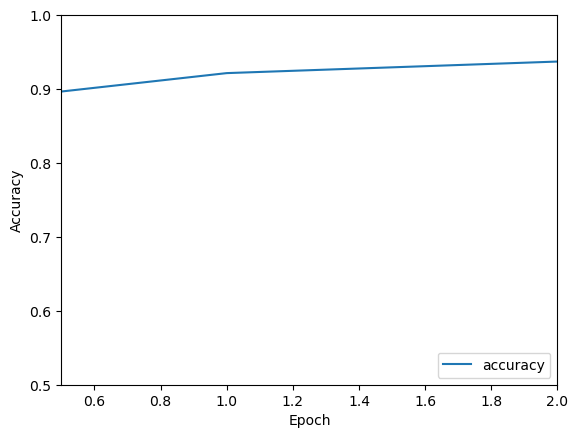

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xlim([0.5, 2])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(train_generator)

In [185]:
print(test_acc)

0.9241713285446167


In [43]:
model.save("./model_02.h5")

In [51]:
# data_path = "./Resources/"
testing_path = "./Resources/TestingImages/"

testing_df = pd.read_csv("./Resources/test.csv")

# testing_df = training_df.drop("Unnamed: 0", axis=1)

# testing_df["label"] = testing_df["label"].astype(str)

testing_df["id"] = testing_df["id"].str.replace("test_data", "./Resources/TestingImages")

# training_df["file_name"] = data_path + training_df["file_name"]

testing_df.head()

,id
0,./Resources/TestingImages_v2/1a2d9fd3e21b4266a...
1,./Resources/TestingImages_v2/ab5df8f441fe4fbf9...
2,./Resources/TestingImages_v2/eb364dd2dfe34feda...
3,./Resources/TestingImages_v2/f76c2580e9644d85a...
4,./Resources/TestingImages_v2/a16495c578b749468...


In [ ]:
from urllib.request import urlopen
from io import BytesIO

image_size = (255, 255)
image_path



In [59]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


Enter the url of the image to identify:  https://red-eye.world/media/pages/c/venturing-beyond-reality-ai-art-and-the-uncanny-valley-phenomenon/456d653168-1700831012/dissociative_dreams_1692281793_3171412004047941847_56170263433.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
real


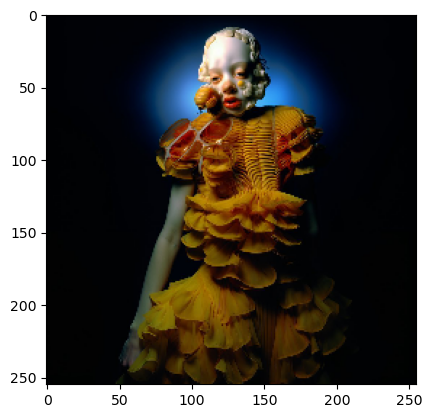

In [139]:
import urllib.request
# from urllib.request import urlopen
import io
#from io import BytesIO

image_size = (255, 255)
label = ["real", "ai"]
#image_path = ""

def predictImage(url):
    with urllib.request.urlopen(url) as rawdata:
        img = tf.keras.preprocessing.image.load_img(io.BytesIO(rawdata.read()), target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)/255
    x = x[np.newaxis,:,:,:]
    plt.imshow(img)
    predictions = model.predict(x)
    prediction = np.argmax(predictions)
    print(label[prediction])
    
url = input("Enter the url of the image to identify: ")
predictImage(url)


1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
real


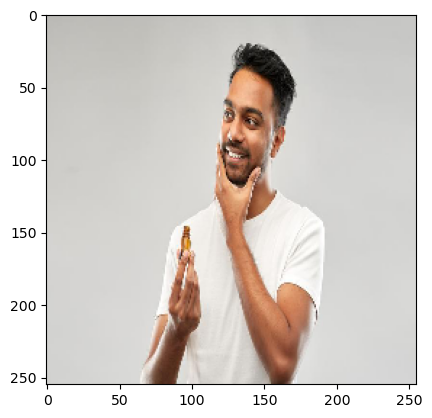

In [141]:
import urllib.request
# from urllib.request import urlopen
import io
#from io import BytesIO

image_size = (255, 255)
label = ["real", "ai"]
image_path = "./Resources/TrainingImages/8542fe161d9147be8e835e50c0de39cd.jpg"

def predictImage(image_path):
    test_df = pd.DataFrame({"file_name": [image_path]})
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)/255
    x = x[np.newaxis,:,:,:]
    print(np.max(x))
    plt.imshow(img)
    predictions = model.predict(x)
    prediction = np.argmax(predictions)
    print(label[prediction])

predictImage(image_path)
